Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and European
counterparts.
They have contracted an automobile consulting company to understand the factors on which the
pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars
in the American market, since those may be very different from the Chinese market. The company
wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types
of cars across the America market.
Business Goal
We are required to model the price of cars with the available independent variables. It will be used
by the management to understand how exactly the prices vary with the independent variables. They
can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price
levels. Further, the model will be a good way for management to understand the pricing dynamics of
a new market.
Dataset link: Link

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df= pd.read_csv('/content/Data.csv')
df

Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    1328  105
20        Ford      Mondeo    1600    1584   94
21        Opel    Insignia    2000    1428   99
22    Mercedes     C-Class    2100    1365   99
23       Skoda     Octavia    1600    1415   99
24       Volvo         S60    2000    1415   99
25    Mercedes         CLA    1500    1465  102
26        Audi          A4    2000    1490  104
27        Audi          A6    2000    1725  114
28       Volvo         V70    1600    1523  109
29         BMW           5    2000    1705  114
30    Mercedes     E-Class    2100    1605  115
31       Volvo        XC70    2000    1746  117
32        Ford       B-Max    1600    1235  104
33         BMW         216    1600    1390  108
34        Opel      Zafira    1600    1405  109
35    Mercedes         SLK    2500    1395  120

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


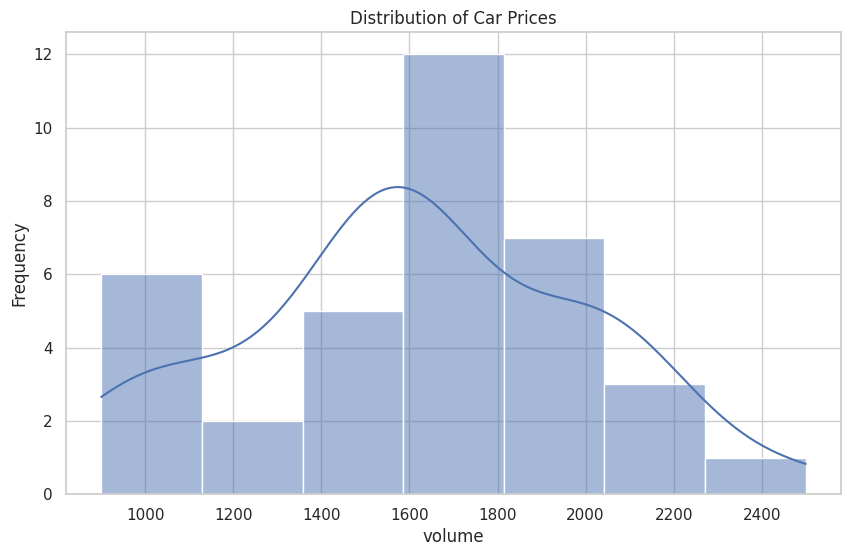

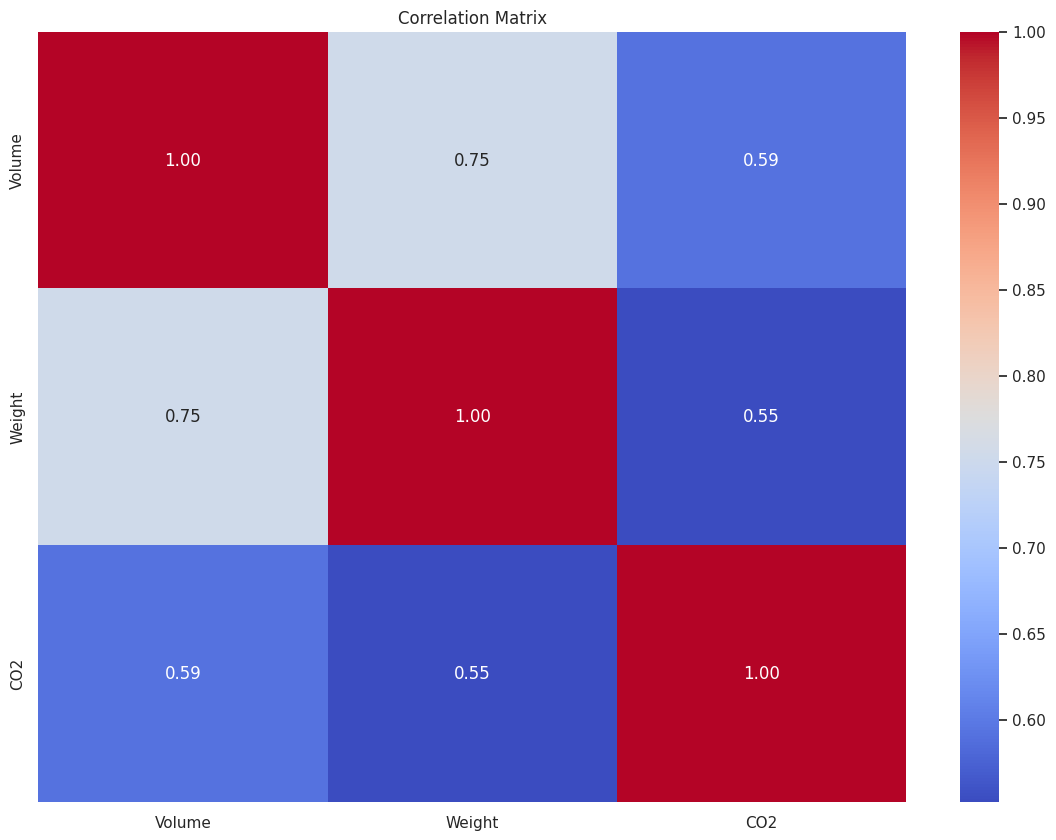

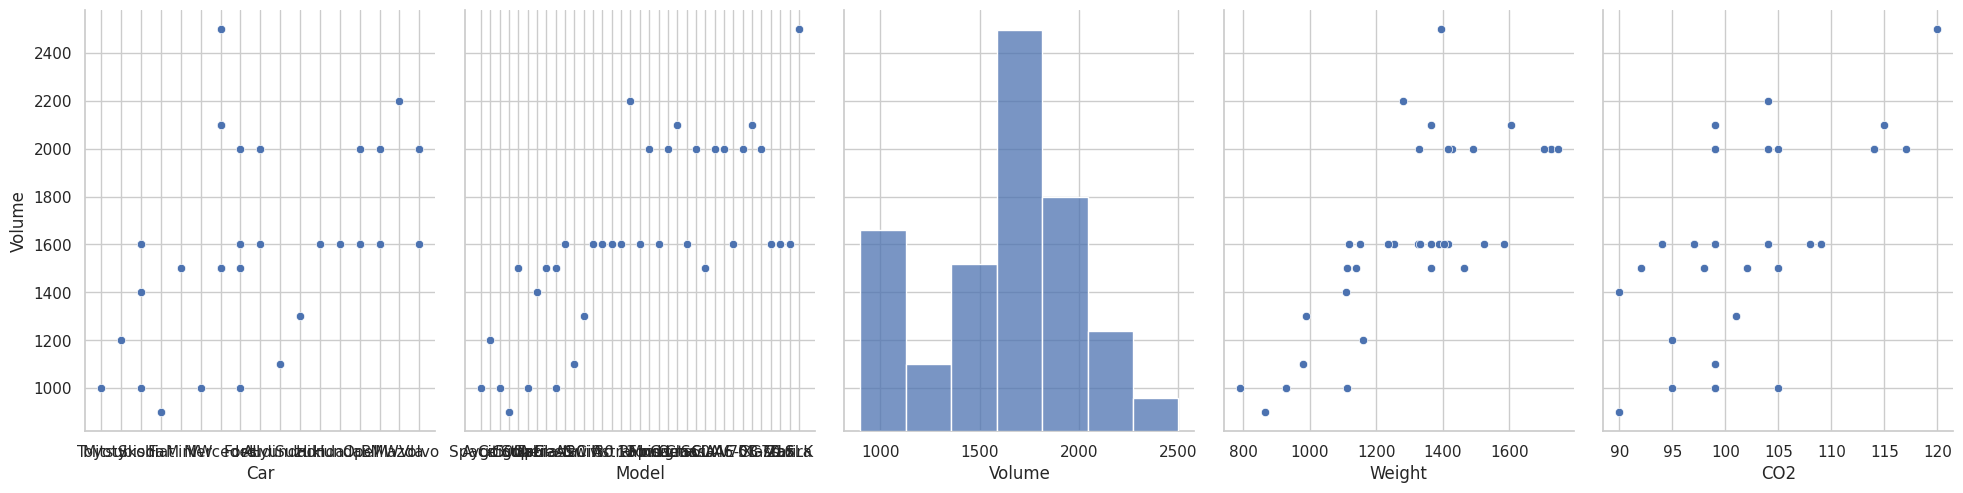

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('volume')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(14, 10))
numeric_data = df.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(df, x_vars=['Car','Model','Volume','Weight','CO2'], y_vars='Volume', height=5, aspect=0.8)
plt.show()

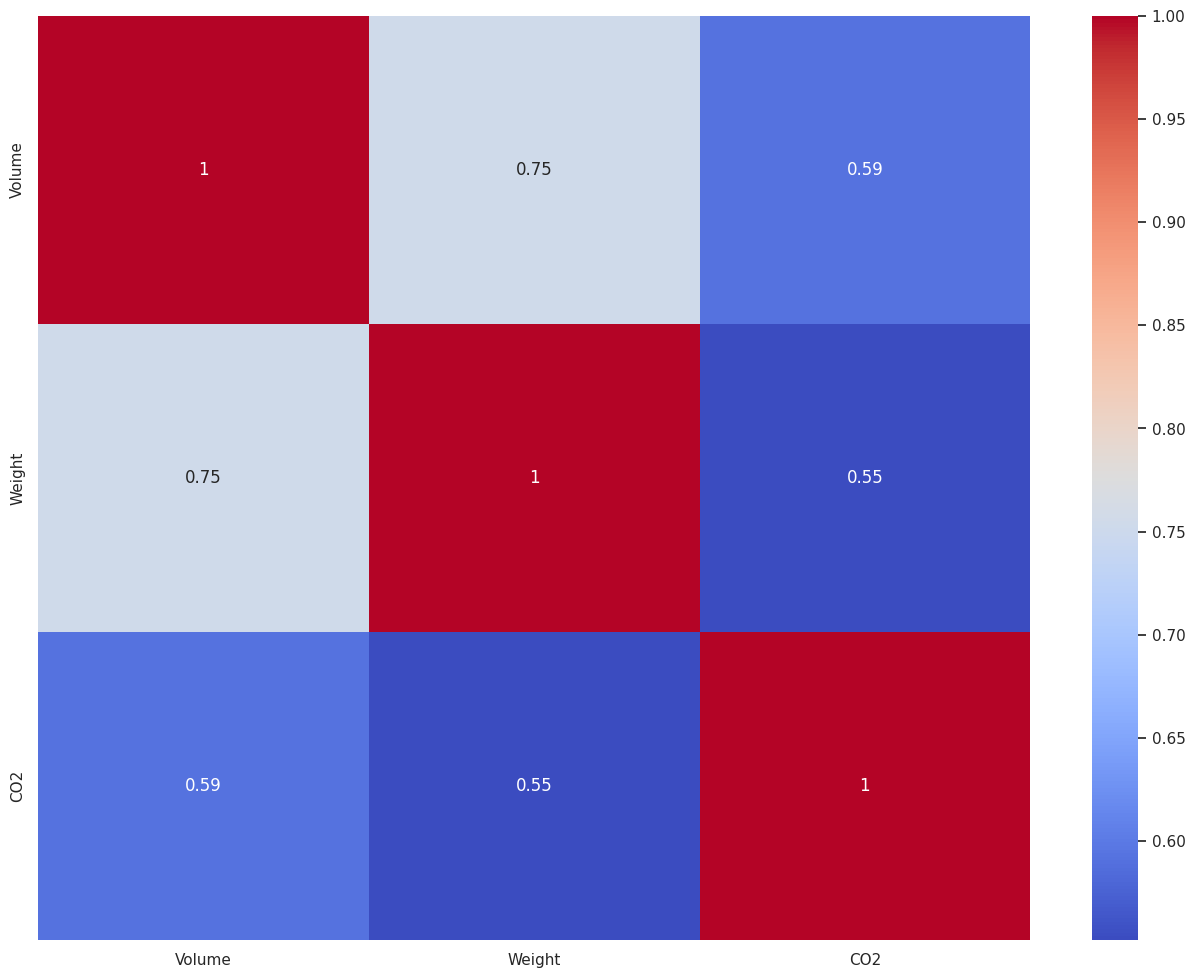

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[non_numeric_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(non_numeric_cols))
car_data_encoded = df.drop(non_numeric_cols, axis=1)
car_data_encoded = pd.concat([car_data_encoded, encoded_df], axis=1)
X = car_data_encoded.drop('Volume', axis=1)
y = car_data_encoded['Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 109112.1032914628
R^2 Score: 0.3765022669059268


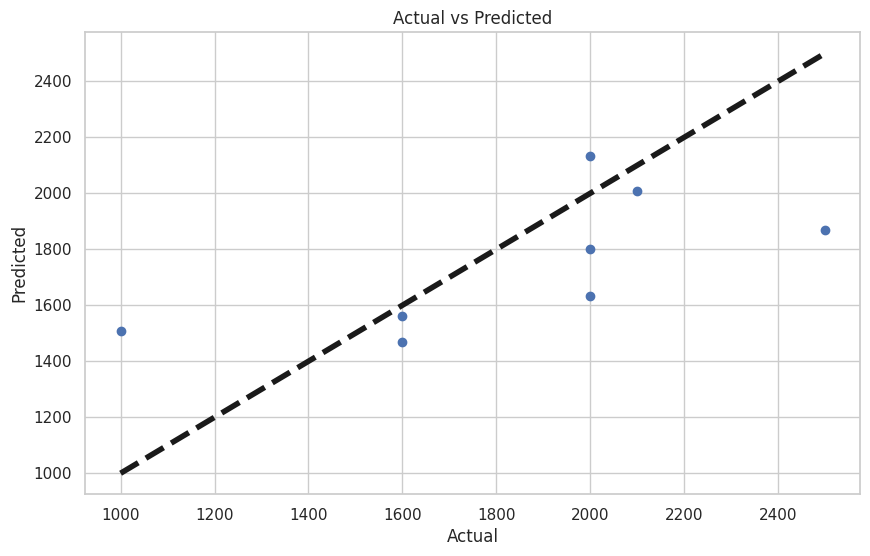

In [14]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [15]:
df.info()
df.describe()
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


Series([], dtype: int64)

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

Car     Model    Volume    Weight       CO2
0  1.274187 -0.708128 -1.593366 -2.103893 -0.411925
1  0.483312  1.198800 -1.071901 -0.554072 -0.956120
2  0.878750 -0.306670 -1.593366 -1.521663 -0.956120
3 -1.098437 -1.310316 -1.854099 -1.789740 -1.636364
4  0.285594 -0.105940 -0.289703 -0.637846  0.404367

In [17]:
df.describe()

Car         Model        Volume        Weight           CO2
count  3.600000e+01  3.600000e+01  3.600000e+01  3.600000e+01  3.600000e+01
mean   5.396917e-17 -1.603655e-16  8.635068e-17 -2.498002e-16  8.881784e-16
std    1.014185e+00  1.014185e+00  1.014185e+00  1.014185e+00  1.014185e+00
min   -1.493874e+00 -1.711775e+00 -1.854099e+00 -2.103893e+00 -1.636364e+00
25%   -9.007183e-01 -8.335841e-01 -3.548862e-01 -7.331394e-01 -5.819863e-01
50%    8.787496e-02  4.460651e-02 -2.897030e-02  1.538185e-01 -4.119254e-01
75%    8.787496e-01  8.224325e-01  1.013960e+00  5.276602e-01  4.043671e-01
max    1.669624e+00  1.700623e+00  2.317624e+00  1.900508e+00  2.445098e+00

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Car     36 non-null     float64
 1   Model   36 non-null     float64
 2   Volume  36 non-null     float64
 3   Weight  36 non-null     float64
 4   CO2     36 non-null     float64
dtypes: float64(5)
memory usage: 1.5 KB


In [19]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64